# EDA y Visualziación de datos con Python | Listados de AirBnB en Nueva York (2024) 

*Análisis exploratorio sobre el listado de AirBnB en Nueva York. En esta notebook se realizara limpieza de datos, detección de outliers y visualización de patrones clave.*

## 1. Carga de módulos y datos.

### 1.1. Importamos las librerías 

In [2]:
# Librerias de Python.
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Mostramos los plots en la misma notebook y no en una ventana emergente.
%matplotlib inline 

### 1.2. Carga del Dataset.

In [3]:
def cargarDataSet(ruta):
    """
    Carga el dataset desde la ruta especificada. Si hay algún error, muestra un mensaje.
    - Parámetros:
        ruta (str): Ruta del archivo CSV.
    - Retorna:
        df: El data frame cargado o None si hay error.
    """
    try:
        df = pd.read_csv(ruta, encoding_errors='ignore')
        return df
    except Exception as e:
        print(f"Error al cargar datos: {e}")
        return None

rutaArchivo = "dataSet/airBnB2024NY.csv"
df = cargarDataSet(rutaArchivo)

if df is not None:
    print("Datos cargados correctamente.")
else:
    print("Verificar ruta o formato.")


Datos cargados correctamente.


## 2. Exploración inicial

In [4]:
print("Primeras 5 filas del dataset:")
display(df.head())

Primeras 5 filas del dataset:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [5]:
print("\nDimensiones del dataset:")
print(df.shape)


Dimensiones del dataset:
(20770, 22)


In [6]:
print("Información general del dataset:\n")
df.info()

Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12

In [7]:
print("\nEstadísticas descriptivas:")
display(df.describe())


Estadísticas descriptivas:


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [8]:
print("Cantidad de valores únicos por columna:")
df.nunique()

Cantidad de valores únicos por columna:


id                                13203
name                               9836
host_id                           12449
host_name                          5815
neighbourhood_group                   5
neighbourhood                       221
latitude                          15375
longitude                         14468
room_type                             4
price                               784
minimum_nights                       69
number_of_reviews                   469
last_review                        1878
reviews_per_month                   783
calculated_host_listings_count       68
availability_365                    366
number_of_reviews_ltm               153
license                             879
rating                              162
bedrooms                             12
beds                                 17
baths                                17
dtype: int64

## 3. Limpieza de datos

In [9]:
print(f"La cantidad de filas duplicadas en el dataset es de: {df.duplicated().sum()}")

La cantidad de filas duplicadas en el dataset es de: 12


In [10]:
print("Eliminamos las columnas repetidas y verificamos que se hayan borrado.")
df.drop_duplicates(inplace=True)

print(f"La cantidad de filas duplicadas en el dataset es de: {df.duplicated().sum()}")

Eliminamos las columnas repetidas y verificamos que se hayan borrado.
La cantidad de filas duplicadas en el dataset es de: 0


In [11]:
print("Mostramos la cantidad de valores nulos en cada columnas:")
df.isnull().sum()

Mostramos la cantidad de valores nulos en cada columnas:


id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      7
latitude                           7
longitude                          7
room_type                          7
price                             34
minimum_nights                     7
number_of_reviews                  7
last_review                        7
reviews_per_month                  7
calculated_host_listings_count     7
availability_365                   7
number_of_reviews_ltm              7
license                            0
rating                             0
bedrooms                           0
beds                               0
baths                              0
dtype: int64

In [12]:
print("Eliminamos los nulos de columnas y verificamos que se hayan borrado.")
df.dropna(inplace=True)

df.isnull().sum()

Eliminamos los nulos de columnas y verificamos que se hayan borrado.


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [13]:
df.dtypes

id                                float64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
number_of_reviews_ltm             float64
license                            object
rating                             object
bedrooms                           object
beds                                int64
baths                              object
dtype: object

In [14]:
# Cambiamos el datatype de 'id', 'host_id' y 'last_review'.
df['id'] = df['id'].astype(object)

df['host_id'] = df['host_id'].astype(object)

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


df.dtypes

C:\Users\Admin\AppData\Local\Temp\ipykernel_16280\2409007977.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


id                                        object
name                                      object
host_id                                   object
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                           float64
number_of_reviews                        float64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count           float64
availability_365                         float64
number_of_reviews_ltm                    float64
license                                   object
rating                                    object
bedrooms                                  object
beds                

## 4. Análisis Exploratorio de Datos (EDA)

### 4.1. Análisis Univariado

<Axes: xlabel='price'>

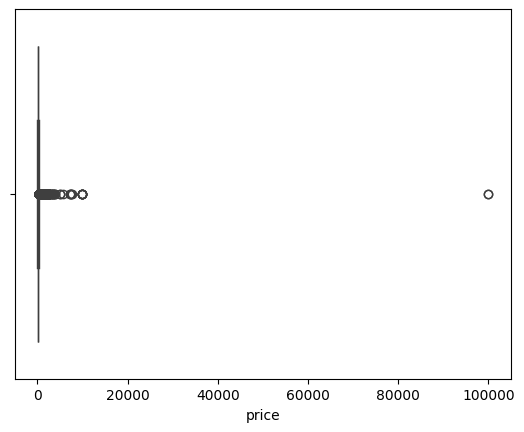

In [15]:
# Analisis Univariado de la variable 'price'.
# Boxplot para visualizar la distribución de precios y encontrar posibles outliers.
sns.boxplot(data=df, x='price')

In [16]:
# Como encontramos un outlier en el boxplot de 'price', aplicamos un tratamiento utilizando el método IQR
Q1 = df['price'].quantile(0.25) # 1er Quartil 
Q3 = df['price'].quantile(0.75) # 3er Quartil

# Calculamos el Rango Intercuartílico (IQR), que es la diferencia entre Q3 y Q1.
IQR = Q3 - Q1
print(F"El primer quartil es {Q1} y el tercero es {Q3}")
print(f"\nEl IQR es {IQR}")

# Calculamos los umbrales inferior y superior para identificar outliers.
umbralMenor = (Q1 - 1.5 * IQR)
umbralMayor = (Q3 + 1.5 * IQR)

print(f"\nEl umbral sera de {umbralMenor} a {umbralMayor}")

# Mostramos los registros que están fuera del rango definido por el IQR
df[(df['price'] < umbralMenor) | (df['price'] > umbralMayor)]

El primer quartil es 80.0 y el tercero es 199.0

El IQR es 119.0

El umbral sera de -98.5 a 377.5


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20,29923599.0,Serviced apartment in New York City · Studio ·...,220229838,Chamber Hotel,Manhattan,Midtown,40.761760,-73.976590,Hotel room,1000.0,...,2019-02-07,0.02,10.0,363.0,0.0,Exempt,No rating,Studio,2,1
22,34718504.0,Condo in New York · 2 bedrooms · 2 beds · 2 baths,6674394,Eri,Manhattan,Upper West Side,40.792830,-73.971900,Entire home/apt,425.0,...,2019-06-25,0.02,1.0,358.0,0.0,No License,No rating,2,2,2
52,1027808.0,Loft in New York · ★4.87 · 2 bedrooms · 1 bed ...,5655889,East Village Loft,Manhattan,East Village,40.721540,-73.981740,Entire home/apt,450.0,...,2023-05-11,0.42,1.0,355.0,2.0,No License,4.87,2,1,2
54,1146653.0,Condo in New York · ★4.90 · 2 bedrooms · 1 bed...,836168,Henry,Manhattan,Upper West Side,40.792960,-73.964990,Entire home/apt,1000.0,...,2016-01-27,0.18,10.0,364.0,0.0,No License,4.9,2,1,1
69,807000000000000000.0,Home in Queens · ★4.50 · 6 bedrooms · 8 beds ·...,496749638,B,Queens,South Ozone Park,40.664932,-73.815531,Entire home/apt,900.0,...,2023-10-13,1.40,2.0,365.0,14.0,No License,4.5,6,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20669,40239461.0,Townhouse in Brooklyn · ★4.50 · 2 bedrooms · 2...,3591955,Charles,Brooklyn,Bedford-Stuyvesant,40.685340,-73.934620,Entire home/apt,400.0,...,2023-04-17,0.14,1.0,83.0,1.0,No License,4.5,2,2,2
20687,31001555.0,Boutique hotel in New York · ★5.0 · 1 bedroom ...,26556695,Justin And Alyssa,Manhattan,Midtown,40.762170,-73.973490,Private room,1150.0,...,2023-09-30,0.09,6.0,365.0,2.0,Exempt,5,1,1,1
20703,27200105.0,Rental unit in Brooklyn · ★4.84 · 2 bedrooms ·...,416361,O,Brooklyn,Bedford-Stuyvesant,40.680390,-73.943680,Entire home/apt,395.0,...,2023-07-26,0.65,1.0,178.0,4.0,No License,4.84,2,2,1.5
20723,45505393.0,Rental unit in New York · ★5.0 · 2 bedrooms · ...,25596933,Anna,Manhattan,Tribeca,40.720640,-74.009350,Entire home/apt,700.0,...,2022-11-22,0.10,1.0,155.0,0.0,No License,5,2,2,2


In [17]:
# El IQR marcó como outliers los precios mayores a 377.5 USD, pero vamos a usar un tope de 1500 USD.
# Así incluimos alojamientos más caros sin que distorsionen tanto el análisis.

dfSinOutlier = df[df['price'] < 1500].copy()
dfSinOutlier.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,20636.000000,20636.000000,20636.000000,20636.000000,20636.000000,20636,20636.000000,20636.000000,20636.000000,20636.000000,20636.000000
mean,40.726792,-73.939033,165.289252,28.580103,42.670721,2023-01-18 21:09:44.066679808,1.260605,18.905311,205.765652,10.881905,1.714528
min,40.500314,-74.249840,10.000000,1.000000,1.000000,2011-10-12 00:00:00,0.010000,1.000000,0.000000,0.000000,1.000000
25%,40.684126,-73.980614,80.000000,30.000000,4.000000,2023-01-12 00:00:00,0.210000,1.000000,87.000000,1.000000,1.000000
50%,40.722730,-73.949490,125.000000,30.000000,14.000000,2023-07-23 00:00:00,0.650000,2.000000,214.000000,3.000000,1.000000
75%,40.763171,-73.917315,199.000000,30.000000,49.000000,2023-11-08 00:00:00,1.810000,5.000000,353.000000,15.000000,2.000000
max,40.911147,-73.713650,1499.000000,1250.000000,1865.000000,2024-05-01 00:00:00,75.490000,713.000000,365.000000,1075.000000,18.000000
std,0.060379,0.061456,147.139696,33.614895,73.597800,NaN,1.907277,71.088461,135.073748,21.394386,1.160727


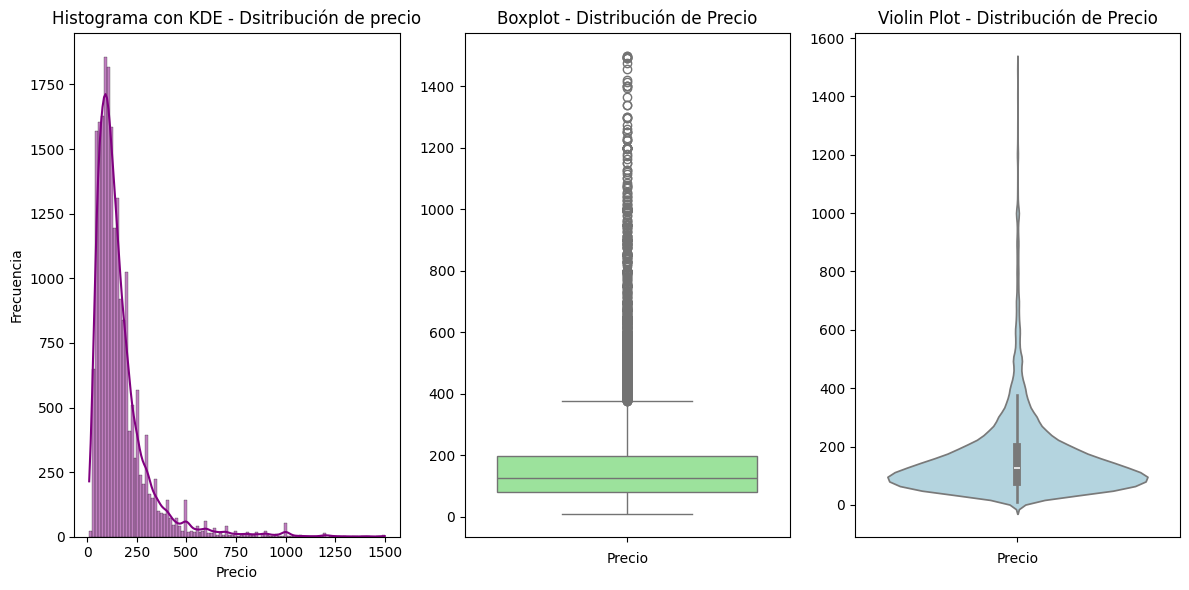

In [18]:
# Visualización de la distribución de precios sin outliers extremos (>1500 USD)

# 1. Histograma + KDE para ver la densidad de precios
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(data=dfSinOutlier, x='price', kde=True, bins=100, color='purple')
plt.title('Histograma con KDE - Dsitribución de precio')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')

#2. Boxplot para observar la dispersión y posibles valores atípicos moderados
plt.subplot(1,3,2)
sns.boxplot(data=dfSinOutlier, y='price', color='lightgreen')
plt.title('Boxplot - Distribución de Precio')
plt.xlabel('Precio')
plt.ylabel('')

# 3. Violin plot para ver la distribución con más detalle
plt.subplot(1,3,3)
sns.violinplot(data=dfSinOutlier, y='price', color='lightblue')
plt.title('Violin Plot - Distribución de Precio')
plt.xlabel('Precio')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

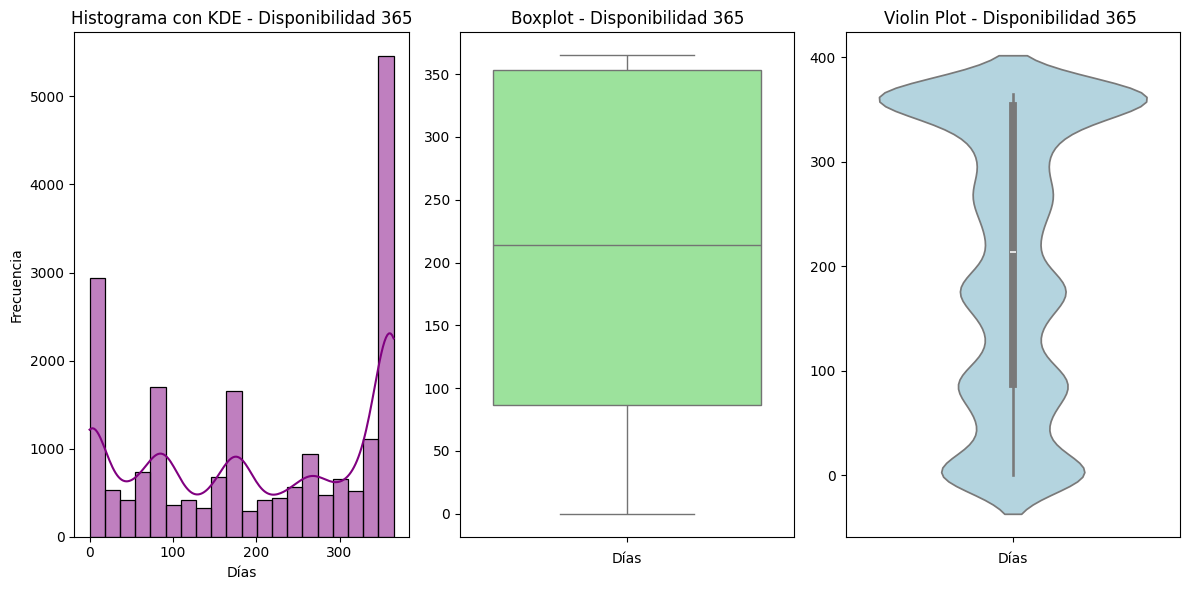

In [19]:
# 1. Histograma con KDE - Distribución de la disponibilidad (días al año)
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.histplot(data=dfSinOutlier, x='availability_365', kde=True, bins=20, color='purple')
plt.title('Histograma con KDE - Disponibilidad 365')
plt.xlabel('Días')
plt.ylabel('Frecuencia')

# 2. Boxplot - Resumen estadístico de la disponibilidad
plt.subplot(1,3,2)
sns.boxplot(data=dfSinOutlier, y='availability_365', color='lightgreen')
plt.title('Boxplot - Disponibilidad 365')
plt.xlabel('Días')
plt.ylabel('')

# 3. Violin plot - Distribución y densidad de la disponibilidad
plt.subplot(1,3,3)
sns.violinplot(data=dfSinOutlier, y='availability_365', color='lightblue')
plt.title('Violin Plot - Disponibilidad 365 ')
plt.xlabel('Días')
plt.ylabel('')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

### 4.2. Análisis Multivariado

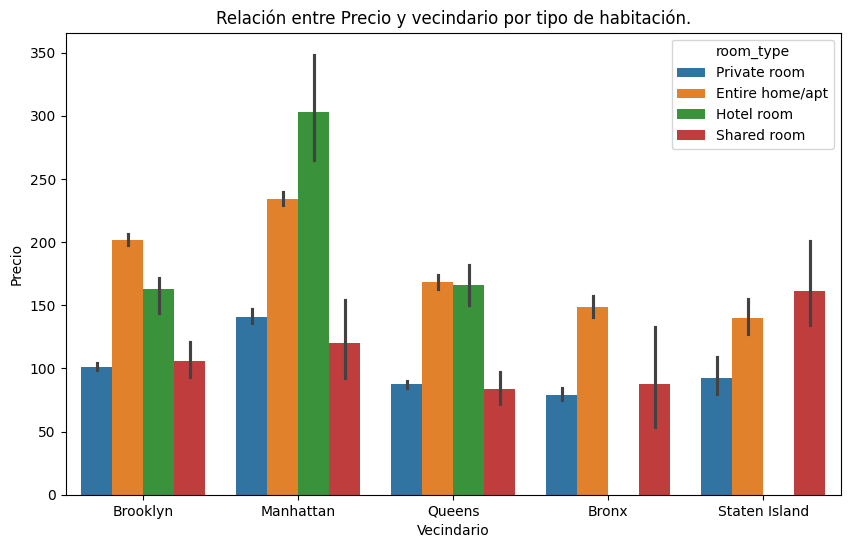

In [20]:
# Creamos el barplot para ver la relación entre vecindario y precio,
# diferenciando por tipo de habitación con 'hue'.
plt.figure(figsize=(10, 6))
sns.barplot(data=dfSinOutlier, x='neighbourhood_group', y='price', hue='room_type')
plt.title("Relación entre Precio y vecindario por tipo de habitación.")
plt.xlabel("Vecindario")
plt.ylabel("Precio")

# Mostramos el gráfico.
plt.show()

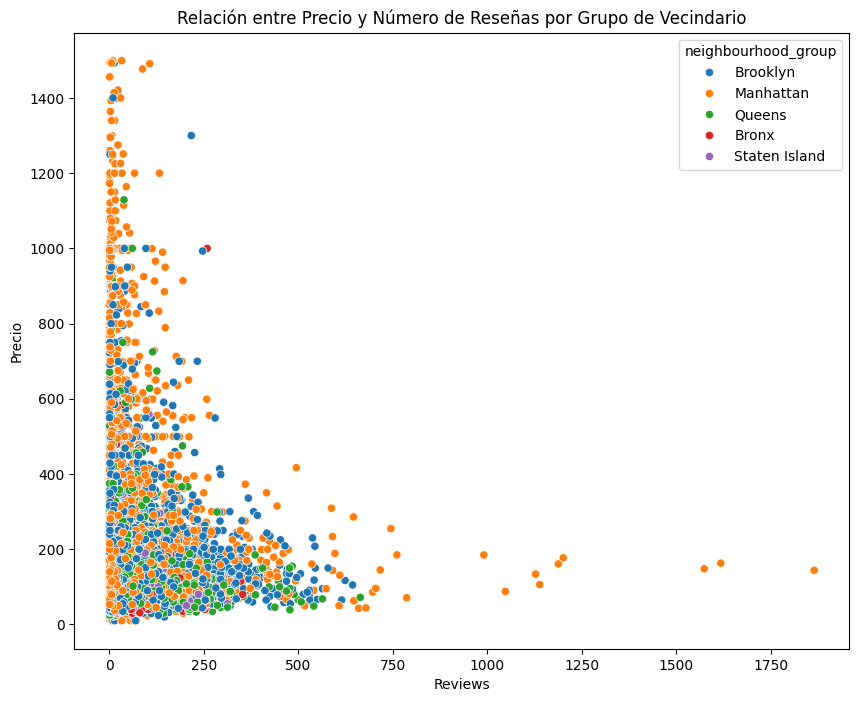

In [21]:
# Creamos el scatterplot para ver la relación entre número de reseñas y precio,
# diferenciando por vecindario con 'hue'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dfSinOutlier, x='number_of_reviews', y='price', hue='neighbourhood_group')
plt.title("Relación entre Precio y Número de Reseñas por Grupo de Vecindario")
plt.xlabel("Reviews")
plt.ylabel("Precio")

# Mostramos el gráfico.
plt.show()

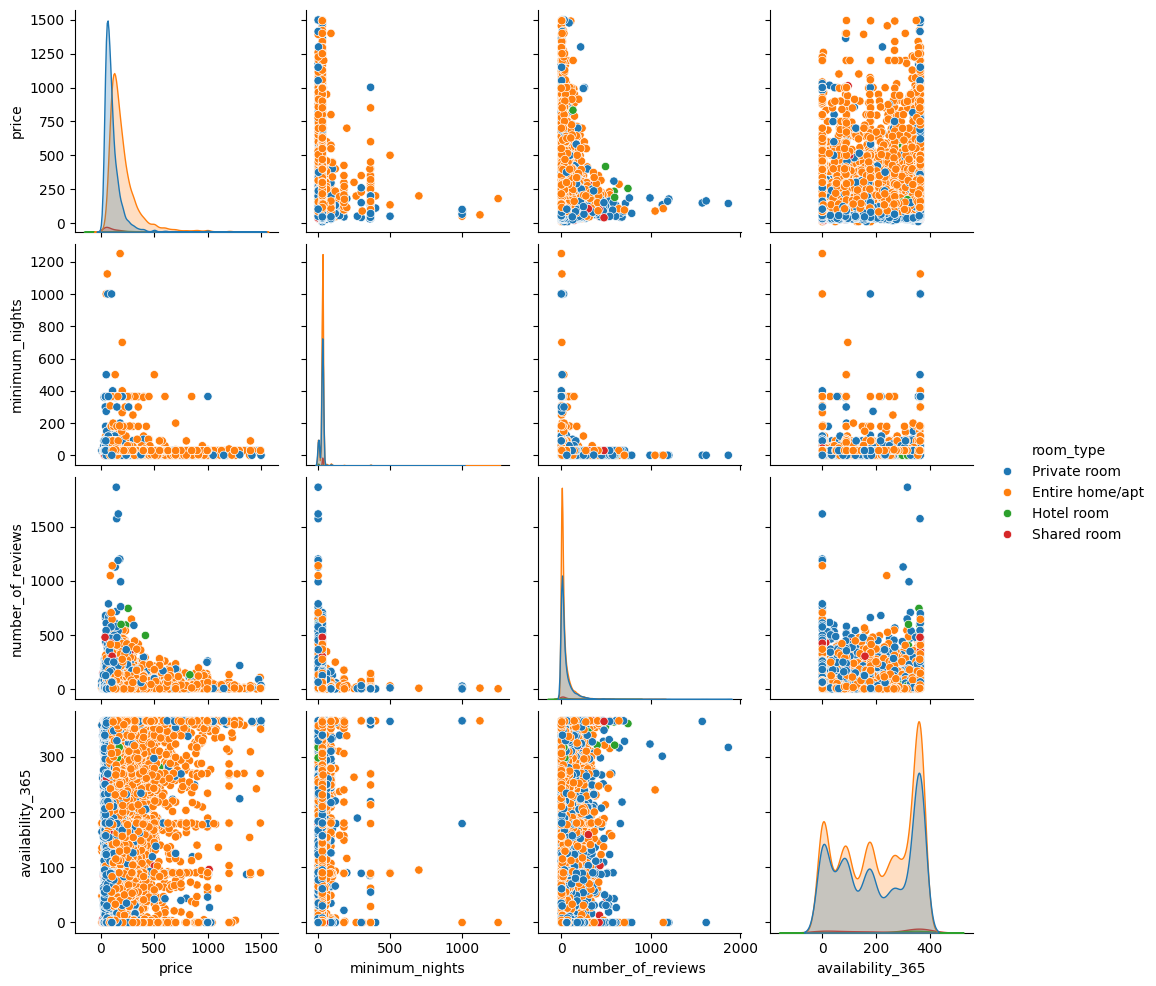

In [ ]:
# Este gráfico muestra las relaciones bivariadas entre las variables:
# 'price', 'minimum_nights', 'number_of_reviews' y 'availability_365',
# segmentadas por tipo de habitación (room_type).
sns.pairplot(data=dfSinOutlier, vars=['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], hue='room_type')
plt.show()

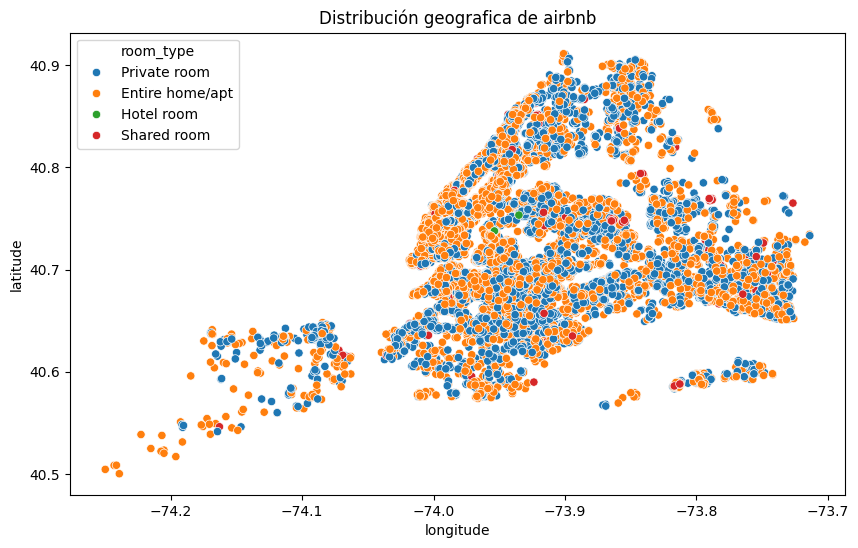

In [23]:
# Distribución geografica diferenciado por tipo de habitación con 'hue'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=dfSinOutlier, x='longitude', y='latitude', hue='room_type')
plt.title("Distribución geografica de airbnb")

# Mostramos el gráfico
plt.show()

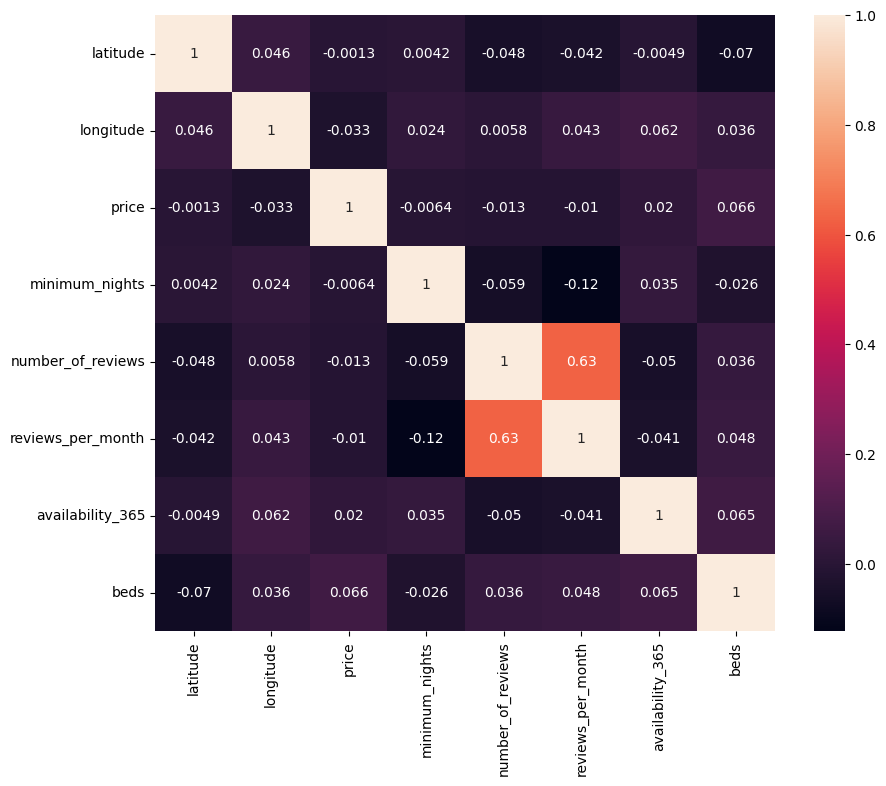

In [ ]:
# Se calcula la matriz de correlación entre las variables numéricas seleccionadas
corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
corr

# Se genera un mapa de calor (heatmap) para visualizar las correlaciones entre variables
plt.figure(figsize=(10,8))
sns.heatmap(data=corr, annot=True)
plt.show()